In [1]:
import pandas as pd, numpy as np
import random

# Método `join()` en pandas

El método `join()` se usa para combinar diferentes DataFrame, principalmente para combinar dos DataFrames horizontalmente, i.e.,: 
unir columnas de un DataFrame a otro basándose en el índice (o una columna llave)

* `join()` es principalmente usado en **indices**
* parámetros `lsuffix` y `rsuffix` para manejar nombres repetidos de columnas distintas.
* parámetro `on`: cuando quieran unir por una columna del DataFrame izquierdo (desde el cual llama a join()) que NO es el índice. 

### Ejemplo

In [2]:
#DataFrame 1: Información de Empleados
emp_info=pd.DataFrame({
    'Nombre': ['Alice','Bob','Charlie','David'],
    'Edad': [25,30,35,40]
}, index=[1,2,3,4])

In [3]:
emp_info

,Nombre,Edad
1,Alice,25
2,Bob,30
3,Charlie,35
4,David,40


In [4]:
#DataFrame 2: Departamento de Empleados
emp_dept=pd.DataFrame({
    'Departamento':['RRHH','IT','Finanzas','Marketing']
},index=[1,2,3,4])

In [5]:
emp_dept

,Departamento
1,RRHH
2,IT
3,Finanzas
4,Marketing


#### Join Simple usando el índice


- Sintaxis `df1.join(df2,...)`, df1 se conoce como el LEFT (izquierdo) DataFrame, y df2 como RIGHT DataFrame

In [7]:
joined_df=emp_info.join(emp_dept,how='left') #Todas las filas de la tabla inzquierda se respetan y les pega las de la derecha. 
joined_df

,Nombre,Edad,Departamento
1,Alice,25,RRHH
2,Bob,30,IT
3,Charlie,35,Finanzas
4,David,40,Marketing


### Por default, el tipo de join que hace es un Left Join

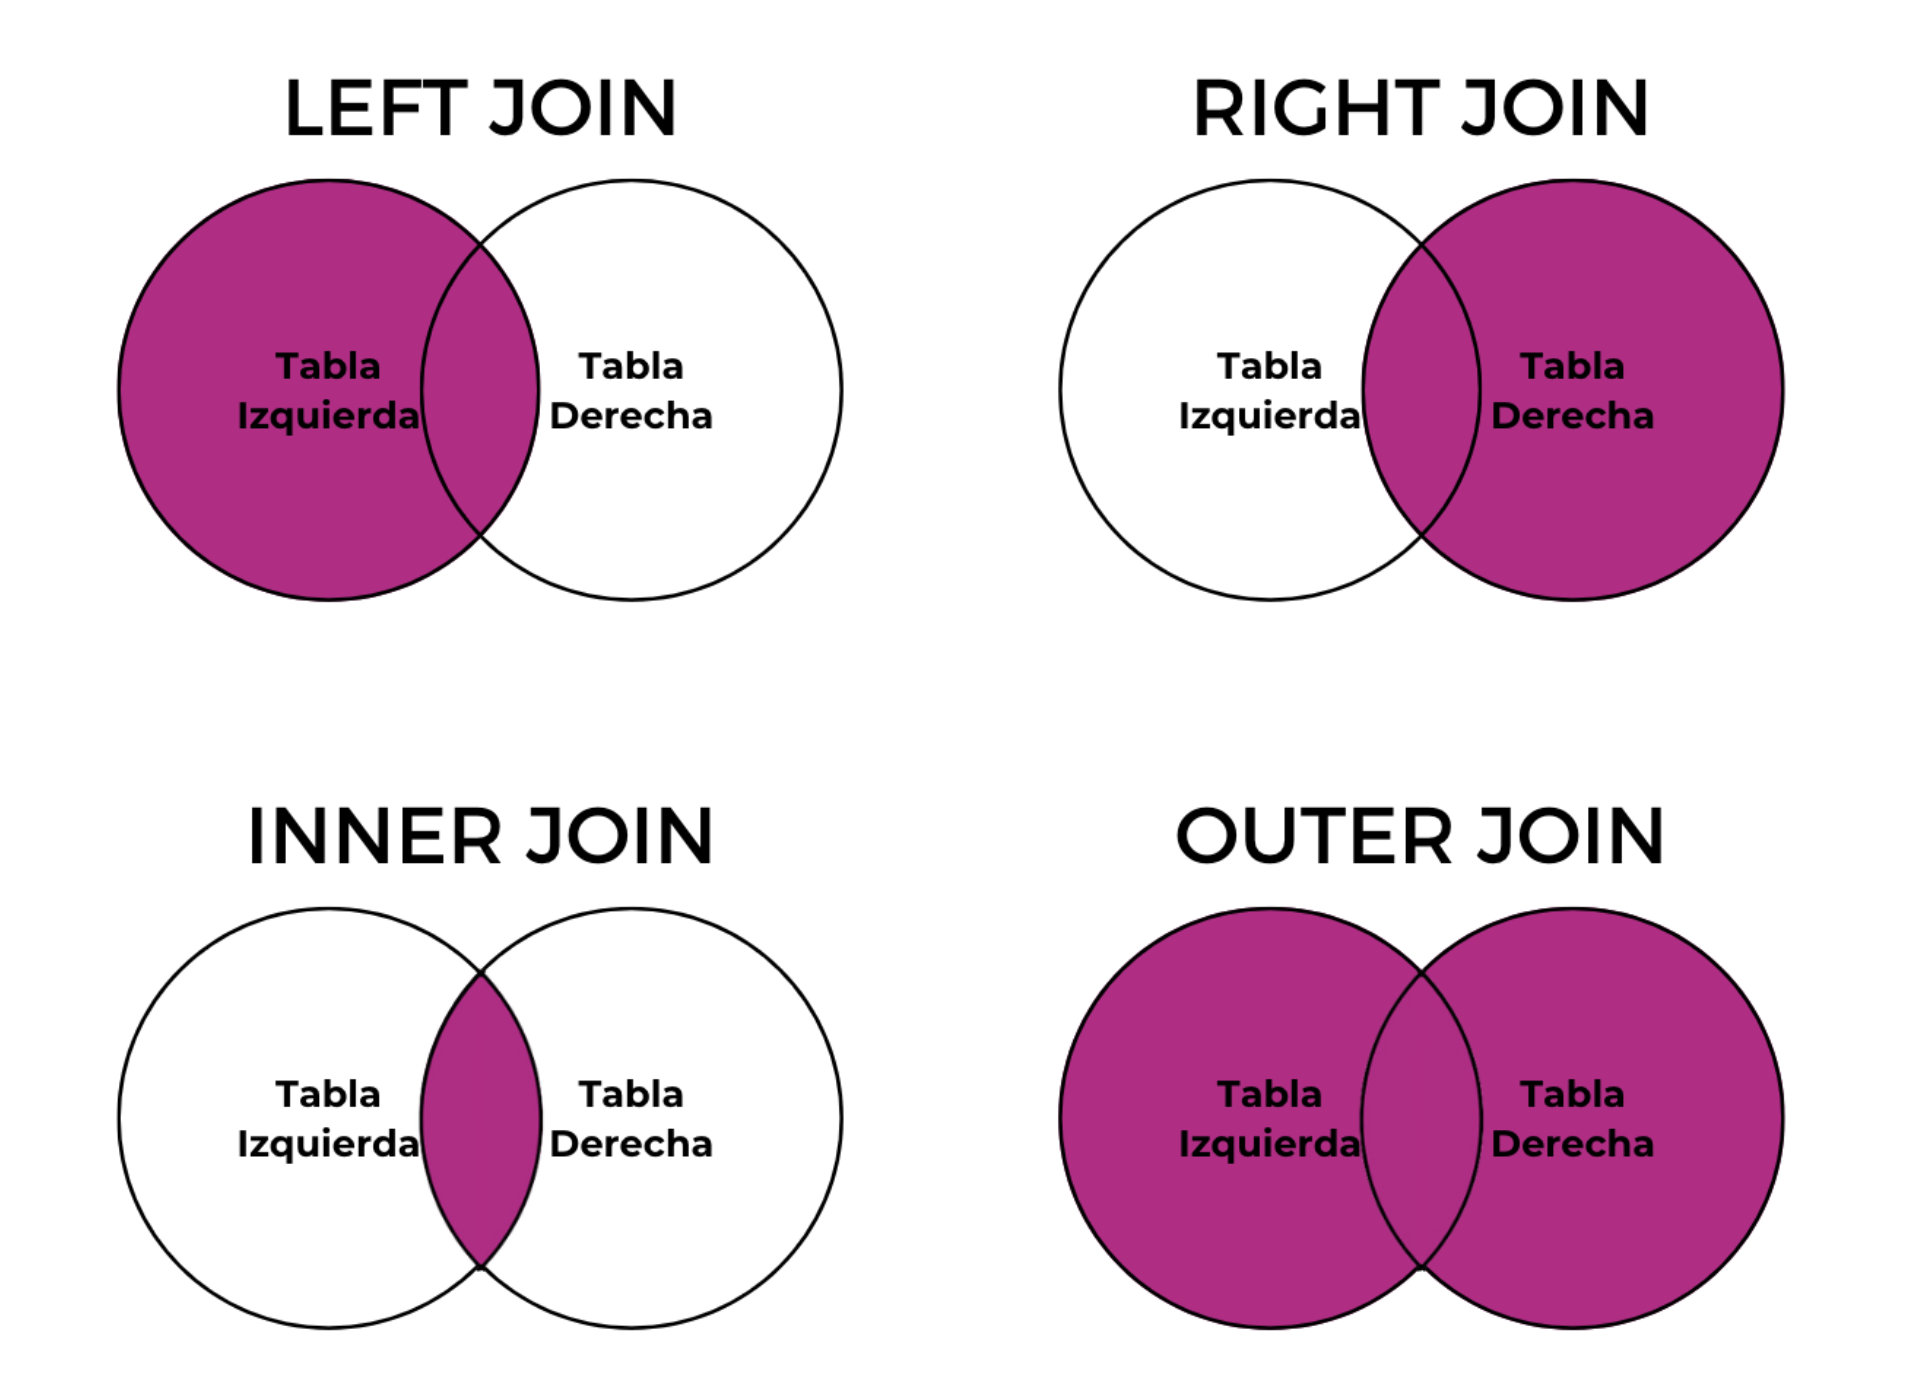

#### 2. Join con Índices Diferentes (usando el parámetro on): 

In [8]:
emp_info

,Nombre,Edad
1,Alice,25
2,Bob,30
3,Charlie,35
4,David,40


#### Quiero unir por una columna del df izquierdo (LEFT DataFrame) que NO es el índice, pero quiero usar el índice del otro (right) dataframe

In [9]:
#Supongamos que la tabla de info de empleados "emp_info2" tiene un id 'Empid'
emp_info2=pd.DataFrame({
    'EmpID':[1,2,3,4],
    'Nombre': ['Alice','Bob','Charlie','David'],
    'Edad': [25,30,35,40]
})
emp_info2

,EmpID,Nombre,Edad
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35
3,4,David,40


In [11]:
emp_dept #nota: el índice de esta tabla coincide con la columna EmpId de emp_info2

,Departamento
1,RRHH
2,IT
3,Finanzas
4,Marketing


In [16]:
emp_info2.join(emp_dept,on='EmpID') #Esto es demasiado circunstancial, aunque sí llega a pasar

,EmpID,Nombre,Edad,Departamento
0,1,Alice,25,RRHH
1,2,Bob,30,IT
2,3,Charlie,35,Finanzas
3,4,David,40,Marketing


In [17]:
#Supongamos que 'emp_dept2' (empleados -deptos) tiene un índice diferente pero una columna común 'EmployeeID'
emp_dept2=pd.DataFrame({
    'EmployeeID':[1,2,3,4],
    'Departamento':["RRHH","IT","Finanzas","Marketing"]
})
emp_dept2
                    

,EmployeeID,Departamento
0,1,RRHH
1,2,IT
2,3,Finanzas
3,4,Marketing


In [18]:
emp_info

,Nombre,Edad
1,Alice,25
2,Bob,30
3,Charlie,35
4,David,40


In [19]:
emp_info.join(emp_dept2.set_index('EmployeeID'))

,Nombre,Edad,Departamento
1,Alice,25,RRHH
2,Bob,30,IT
3,Charlie,35,Finanzas
4,David,40,Marketing


In [20]:
emp_dept2.set_index('EmployeeID')

,Departamento
EmployeeID,
1,RRHH
2,IT
3,Finanzas
4,Marketing


Ahora supongamos que ambas tablas tienen una columna con el mismo nombre (pero información diferente)

In [21]:
#Suponiendo que ambos DataFrames tienen una columna común 'Ubicación'
emp_info['Ubicación']=["CiudadA","CiudadB","CiudadC","CiudadD"]
emp_info

,Nombre,Edad,Ubicación
1,Alice,25,CiudadA
2,Bob,30,CiudadB
3,Charlie,35,CiudadC
4,David,40,CiudadD


In [22]:
emp_dept['Ubicación']=['Oficina1','Oficina2','Oficina3','Oficina4']
emp_dept

,Departamento,Ubicación
1,RRHH,Oficina1
2,IT,Oficina2
3,Finanzas,Oficina3
4,Marketing,Oficina4


3. Parámetros lsuffix, rsuffix para distinguir las variables 'Ubicación'

In [24]:
joined_df=emp_info.join(emp_dept,lsuffix='_emp',rsuffix='_dept')

In [25]:
joined_df

,Nombre,Edad,Ubicación_emp,Departamento,Ubicación_dept
1,Alice,25,CiudadA,RRHH,Oficina1
2,Bob,30,CiudadB,IT,Oficina2
3,Charlie,35,CiudadC,Finanzas,Oficina3
4,David,40,CiudadD,Marketing,Oficina4


# Tipos de Uniones en join()
El tipo de unión que se realiza se puede especificar utilizando el parámetro `how`

- `Left join`: Opción predeterminada. Se especifica con `how='left'`. Devuelve todas las filas del DataFrame izquiero y las filas coincientes del DataFrame derecho.  Las filas no coincidentes en el DataFrame derecho resultan en valores NaN en el DataFrame combinado.

- `Inner Join`: `how='inner'`. Devuelve solo las filas con claves de índice conincidentes en ambos DataFrame

- `Right Join`: Se especifica con `how='right'`. Devuelve todas las filas del DatFrame derecho y las filas coincidentes del DataFrame izquierdo. Las filas no coincidentes del DataFrame izquierdo resultan  en Valores NaN

- `Outer Join`: Se especifica con `how='outer'`. Devuelve todas las filas de ambos DataFrames, alineando las filas de ambos DataFrames que tienen índices coincidentes y llenando con Nan para la coincidencias faltantes en cualquier DataFrame. 

In [26]:
#Dejemos emp_info igual pero modifiquemos emp_dept de la siguiente forma (ya no hay índice igual a 1): 
emp_dept=pd.DataFrame({
    'Departamento':['RRHH','IT','Finanzas','Marketing']
},index=[2,3,4,5])
emp_dept

,Departamento
2,RRHH
3,IT
4,Finanzas
5,Marketing


In [27]:
emp_info

,Nombre,Edad,Ubicación
1,Alice,25,CiudadA
2,Bob,30,CiudadB
3,Charlie,35,CiudadC
4,David,40,CiudadD


In [29]:
#Left Join: 
left_joined=emp_info.join(emp_dept,how='left')
left_joined

,Nombre,Edad,Ubicación,Departamento
1,Alice,25,CiudadA,NaN
2,Bob,30,CiudadB,RRHH
3,Charlie,35,CiudadC,IT
4,David,40,CiudadD,Finanzas


In [30]:
#Inner Join: Intersección. 
inner_joined_df=emp_info.join(emp_dept,how='inner')
inner_joined_df

,Nombre,Edad,Ubicación,Departamento
2,Bob,30,CiudadB,RRHH
3,Charlie,35,CiudadC,IT
4,David,40,CiudadD,Finanzas


In [31]:
#Right Join: Todos los de la tabla derecha y los que hagan match de la izquierda
right_joined_df=emp_info.join(emp_dept,how='right')
right_joined_df

,Nombre,Edad,Ubicación,Departamento
2,Bob,30.0,CiudadB,RRHH
3,Charlie,35.0,CiudadC,IT
4,David,40.0,CiudadD,Finanzas
5,NaN,NaN,NaN,Marketing


In [32]:
#Outer Join: Unión de Todos. 
outer_joined=emp_info.join(emp_dept,how='outer')
outer_joined

,Nombre,Edad,Ubicación,Departamento
1,Alice,25.0,CiudadA,NaN
2,Bob,30.0,CiudadB,RRHH
3,Charlie,35.0,CiudadC,IT
4,David,40.0,CiudadD,Finanzas
5,NaN,NaN,NaN,Marketing


# Multi-index join()

In [33]:
# Primer DataFrame
data1={
    'Score': [85,90,83,89,95]
}
tuples1=[('A','1'),('A','2'),('B','1'),('B','2'),('B','3')]
index1=pd.MultiIndex.from_tuples(tuples1,names=['Group','Subgroup'])
df1=pd.DataFrame(data1,index=index1)
df1

Score
Group Subgroup       
A     1            85
      2            90
B     1            83
      2            89
      3            95

In [35]:
# Segundo Datafframe
data2={
    'Review': ['Good','Excellent','Average','Good','Excellent']
}
tuples2=[('A','1'),('A','2'),('B','2'),('B','3'),('C','1')]
index2=pd.MultiIndex.from_tuples(tuples2, names=['Group','Subgroup'])
df2=pd.DataFrame(data2,index=index2)
df2

Review
Group Subgroup           
A     1              Good
      2         Excellent
B     2           Average
      3              Good
C     1         Excellent

In [36]:
df1.join(df2) #esto es un left join

Score     Review
Group Subgroup                  
A     1            85       Good
      2            90  Excellent
B     1            83        NaN
      2            89    Average
      3            95       Good

In [37]:
df1.join(df2,how='outer') #esto es la unión.

Score     Review
Group Subgroup                  
A     1          85.0       Good
      2          90.0  Excellent
B     1          83.0        NaN
      2          89.0    Average
      3          95.0       Good
C     1           NaN  Excellent

# Método Merge()


El método `merge()`en pandas permite combinar DataFrames basándose en columnas comunes (llaves) o índices. Parámetros clave del método `merge():`:
* `on`: Este parámetros especifica los nombres de las columnas o niveles de índices en los que se une. Estos deben encontrarse en ambos DataFrames.
* `how`: Este parámetros determina el tipo de fusión que se realizará. Incluye: 'left','right','outer' e 'inner'.
* `left_on` y `right_on`: Columnas específicas de los DataFrames izquierdo y derecho para fusionar.
* `suffixes`: Tupla de sufijos de cadena para aplicar a columnas con el mismo nombre, de distnta tabl origne.
* En cuanto a los tipos de merge: **inner**, **left**, **right** y **outer**. Funciona igual que un `join()`

In [43]:
#Creando Dataframes 
data1={
    'EmpID':[1,2,3,4],
    'Name':['Alice','Bob','Charly','David']
}
empleados=pd.DataFrame(data1)

data2={
    'EmpID':[3,4,5,6],
    'Departament':['HR','IT','Finance','Marketing']
}
deptos=pd.DataFrame(data2)

In [44]:
empleados

,EmpID,Name
0,1,Alice
1,2,Bob
2,3,Charly
3,4,David


In [45]:
deptos

,EmpID,Departament
0,3,HR
1,4,IT
2,5,Finance
3,6,Marketing


In [46]:
#Left Merge
left_merged_df=pd.merge(empleados,deptos,on='EmpID',how='left')
left_merged_df

,EmpID,Name,Departament
0,1,Alice,NaN
1,2,Bob,NaN
2,3,Charly,HR
3,4,David,IT


In [47]:
#Inner Merge
inner_merged_df=pd.merge(empleados,deptos, on='EmpID',how='inner')
inner_merged_df

,EmpID,Name,Departament
0,3,Charly,HR
1,4,David,IT


In [48]:
#Right
right_merged_df=pd.merge(empleados,deptos,on='EmpID',how='right')
right_merged_df

,EmpID,Name,Departament
0,3,Charly,HR
1,4,David,IT
2,5,NaN,Finance
3,6,NaN,Marketing


In [49]:
#Outer 
outer_merged_df=pd.merge(empleados,deptos,on='EmpID',how='outer')
outer_merged_df

,EmpID,Name,Departament
0,1,Alice,NaN
1,2,Bob,NaN
2,3,Charly,HR
3,4,David,IT
4,5,NaN,Finance
5,6,NaN,Marketing


### Ejemplos de Merge en más de una Variable (Multi-Variable Merge)

In [52]:
#DataFrame 1: Empleados
data1={
    'EmpID':[1,2,1,2],
    'Year':[2022,2022,2023,2023],
    'Name':['Alice','Mike','Alice','Mike'],
    'Area': ['Business','Finance','Business','Finance']
}
df1=pd.DataFrame(data1)
df1

,EmpID,Year,Name,Area
0,1,2022,Alice,Business
1,2,2022,Mike,Finance
2,1,2023,Alice,Business
3,2,2023,Mike,Finance


In [53]:
#DataFrame 2: Asignación de Proyectos
data2={
    'EmpID':[1,2,1,3],
    'Year':[2022,2022,2023,2023],
    'Project':['Project X','Project Y','Project Z','Project W'],
    'Area': ['Business Dev','Finance','Digital Banking','Finance']
}
df2=pd.DataFrame(data2)
df2

,EmpID,Year,Project,Area
0,1,2022,Project X,Business Dev
1,2,2022,Project Y,Finance
2,1,2023,Project Z,Digital Banking
3,3,2023,Project W,Finance


In [55]:
#Inner Merge: sobre dos variables: Empid y Year
inner_merged=pd.merge(df1,df2,on=["EmpID","Year"],how='inner')
inner_merged

,EmpID,Year,Name,Area_x,Project,Area_y
0,1,2022,Alice,Business,Project X,Business Dev
1,2,2022,Mike,Finance,Project Y,Finance
2,1,2023,Alice,Business,Project Z,Digital Banking


In [56]:
left_merged=pd.merge(df1,df2,on=['EmpID','Year'],how='left')
left_merged

,EmpID,Year,Name,Area_x,Project,Area_y
0,1,2022,Alice,Business,Project X,Business Dev
1,2,2022,Mike,Finance,Project Y,Finance
2,1,2023,Alice,Business,Project Z,Digital Banking
3,2,2023,Mike,Finance,NaN,NaN


In [57]:
outer_merged=pd.merge(df1,df2,on=['EmpID','Year'],how='outer')
outer_merged

,EmpID,Year,Name,Area_x,Project,Area_y
0,1,2022,Alice,Business,Project X,Business Dev
1,2,2022,Mike,Finance,Project Y,Finance
2,1,2023,Alice,Business,Project Z,Digital Banking
3,2,2023,Mike,Finance,NaN,NaN
4,3,2023,NaN,NaN,Project W,Finance


* Parámetro **suffixes** para distinguir variables con el mismo nombre pero de diferente tabla de origen

In [58]:
pd.merge(df1,df2,on=["EmpID","Year"],how='left',suffixes=('_emp','_proj'))

,EmpID,Year,Name,Area_emp,Project,Area_proj
0,1,2022,Alice,Business,Project X,Business Dev
1,2,2022,Mike,Finance,Project Y,Finance
2,1,2023,Alice,Business,Project Z,Digital Banking
3,2,2023,Mike,Finance,NaN,NaN


In [60]:
pd.merge(df1,df2,on=["EmpID","Year"],how='left',suffixes=('_emp','_proj'),sort=True)#ordena en función de la llave

,EmpID,Year,Name,Area_emp,Project,Area_proj
0,1,2022,Alice,Business,Project X,Business Dev
1,1,2023,Alice,Business,Project Z,Digital Banking
2,2,2022,Mike,Finance,Project Y,Finance
3,2,2023,Mike,Finance,NaN,NaN


In [61]:
#Recordemos la tabla deptos, y supongamos que la variable ID del empleado de llama 'Id' y no 'EmpID': 
deptos2=deptos
deptos2.columns=['Id','Department']
deptos2

,Id,Department
0,3,HR
1,4,IT
2,5,Finance
3,6,Marketing


In [62]:
empleados

,EmpID,Name
0,1,Alice
1,2,Bob
2,3,Charly
3,4,David


Quiero hacer un merge de estas tablas a través de ID, pero se llaman diferente en cada table. Ocupo parámetro `left_on` y `right_on`

In [64]:
pd.merge(empleados,deptos2,how='left',left_on='EmpID',right_on='Id')

,EmpID,Name,Id,Department
0,1,Alice,NaN,NaN
1,2,Bob,NaN,NaN
2,3,Charly,3.0,HR
3,4,David,4.0,IT


In [65]:
pd.merge(empleados,deptos2,how='left',on='EmpID') # da error

KeyError: 'EmpID'

In [66]:
empleados.merge(deptos2,how='left',left_on='EmpID',right_on='Id')

,EmpID,Name,Id,Department
0,1,Alice,NaN,NaN
1,2,Bob,NaN,NaN
2,3,Charly,3.0,HR
3,4,David,4.0,IT
